In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
data = pd.read_csv("E:\\Imarticus-DSP\\Data sets\\Mushroom dataset\\mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [18]:
for col in data.columns:
    data[col] = lbl.fit_transform(data[col])

In [19]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [22]:
#separate the x and y variables
y = data['class']
x = data.iloc[:,1:23]

In [23]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [35]:
from collections import Counter

In [36]:
Counter(y)

Counter({0: 4208, 1: 3916})

In [24]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [25]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [28]:
x_train.shape

(5686, 22)

In [29]:
y_train.shape

(5686,)

In [31]:
x_test.shape

(2438, 22)

In [32]:
y_test.shape

(2438,)

In [33]:
from sklearn.cluster import KMeans

In [37]:
k_means=KMeans(n_clusters=2)

In [38]:
k_means.fit(x_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
k_means_predict = k_means.predict(x_test)

AttributeError: 'KMeans' object has no attribute 'predict_prob'

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
k_means_acc = accuracy_score(k_means_predict, y_test)

In [44]:
k_means_conf = confusion_matrix(k_means_predict, y_test)

In [45]:
k_means_acc

0.70139458572600488

In [46]:
k_means_conf

array([[1210,  678],
       [  50,  500]], dtype=int64)

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, k_means_predict)

In [52]:
k_means_auc = auc(fpr,tpr)

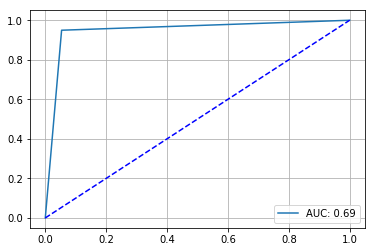

In [74]:
plt.plot(fpr,tpr, label = 'AUC: %0.2f' % k_means_auc)
plt.plot([0,1], [0,1], 'b--')
plt.legend()
plt.grid()

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [62]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
lr_predict= lr.predict(x_test)

In [64]:
lr_accuracy = accuracy_score(lr_predict, y_test)

In [65]:
lr_conf = confusion_matrix(lr_predict, y_test)

In [66]:
fpr, tpr, threshold = roc_curve(lr_predict, y_test)

In [67]:
lr_auc = auc(fpr,tpr)

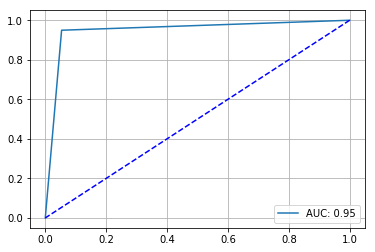

In [73]:
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % lr_auc)
plt.plot([1,0],[1,0],'b--')
plt.legend()
plt.grid()

In [71]:
lr_accuracy


array([[1201,   68],
       [  59, 1110]], dtype=int64)

In [72]:
lr_conf

array([[1201,   68],
       [  59, 1110]], dtype=int64)